# Project-Bike Renting

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
#set directory 
os.chdir("R:/vishakha r progaram/projects")

In [3]:
#check the setted directory
os.getcwd()

'R:\\vishakha r progaram\\projects'

In [4]:
#accessing the problem statement
Df = pd.read_csv("day.csv")

# Exploratory  Data analysis

In [5]:
#Dimenstion of data
Df.shape

(731, 16)

In [6]:
#details of data
Df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
#index ranges
Df.index

RangeIndex(start=0, stop=731, step=1)

In [8]:
type(Df)

pandas.core.frame.DataFrame

In [9]:
Df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
#unique value present in each 
Df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [11]:
#Drop some unwanted varable like dteday as the data is not time base so remove this varable
#Drop instace variable as it giving the info of index so
#Drop casual and registered as it givig total cnt info 
Df = Df.drop(Df.columns[[0, 1,13,14]], axis = "columns")

In [12]:
#after dropping columns name

Df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [13]:
#dimension after droping some variable
Df.shape

(731, 12)

In [14]:
#grouping the varibale 
cat_var=['season','holiday','weekday','workingday','weathersit','yr','mnth']

num_var=['temp','atemp','hum','windspeed']

In [15]:
# counting of each unique values in each categorical variable
print("value counts of categorical column")
print()
for i in cat_var:
    print(i)
    print(Df[i].value_counts())

value counts of categorical column

season
3    188
2    184
1    181
4    178
Name: season, dtype: int64
holiday
0    710
1     21
Name: holiday, dtype: int64
weekday
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
workingday
1    500
0    231
Name: workingday, dtype: int64
weathersit
1    463
2    247
3     21
Name: weathersit, dtype: int64
yr
1    366
0    365
Name: yr, dtype: int64
mnth
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64


# Data Pre processing

MISSING VALUE ANALYSIS

In [16]:
# checking for missing values in dataset
Df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

 No missing value found

## OUTLIER ANALYSIS

temp


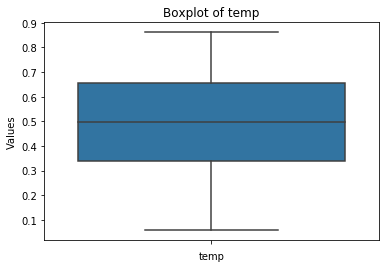

atemp


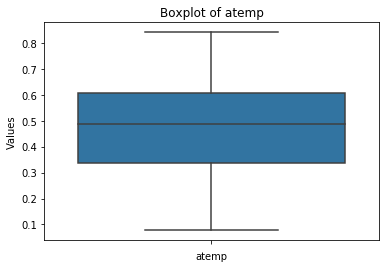

hum


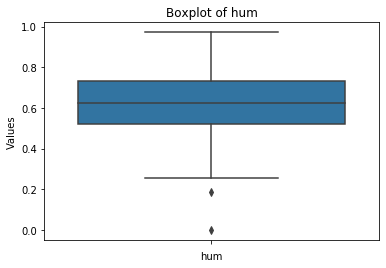

windspeed


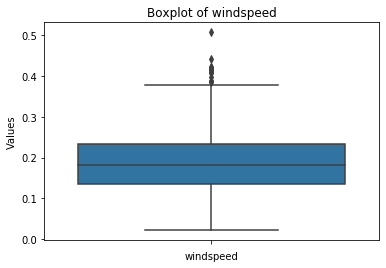

In [17]:
#checking for outlier with help of boxplot
for i in num_var:
    print(i)
    sns.boxplot(y = Df[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

Here we have fount outlier in variabale windspeed,hum.

In [18]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR

for i in num_var:
    print(i)
    q75, q25 = np.percentile(Df.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    

# replace outliers with NA

    Df.loc[Df[i]<Innerfence, i] = np.nan
    Df.loc[Df[i]>Upperfence, i] = np.nan

temp
Innerfence= -0.14041600000000015
Upperfence= 1.1329160000000003
IQR =0.3183330000000001
atemp
Innerfence= -0.06829675000000018
Upperfence= 1.0147412500000002
IQR =0.2707595000000001
hum
Innerfence= 0.20468725
Upperfence= 1.0455212500000002
IQR =0.21020850000000002
windspeed
Innerfence= -0.012446750000000034
Upperfence= 0.38061125
IQR =0.0982645


In [19]:
#checking outlier conversion
Df.isnull().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
cnt            0
dtype: int64

In [20]:
#imputing outlier 
Df['hum'] = Df['hum'].fillna(Df['hum'].median())
Df['windspeed'] = Df['windspeed'].fillna(Df['windspeed'].median())

In [21]:
Df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

# Exploring data with help of visualization

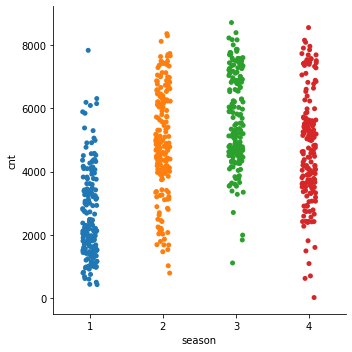

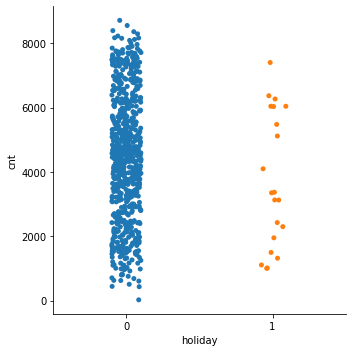

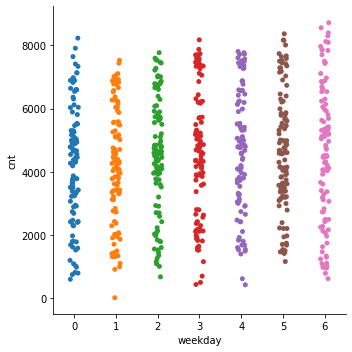

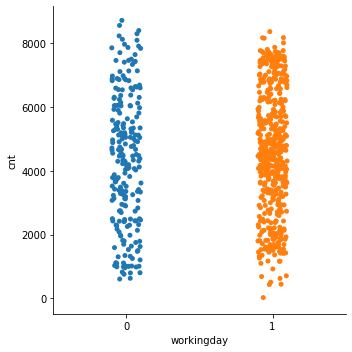

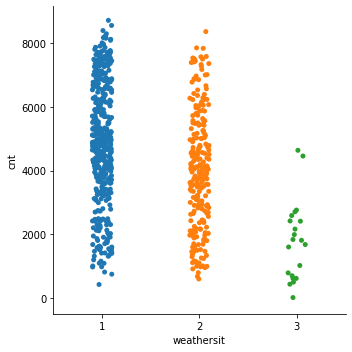

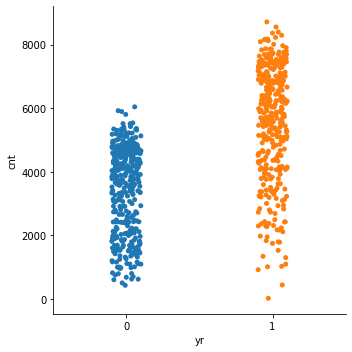

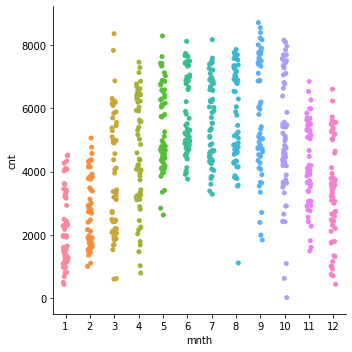

In [22]:
#some plots for categorical variable
for i in cat_var:
    sns.catplot(x= i, y= "cnt", data=Df)

## by above visualiztion 
season = season summer=2,fall=3,spring=4 have maximumum count
yr = 1= 2012 has maximum count 
mnth = in month 3 to 10 month have hisghest count
holiday = all holiday has maximumu count
weekday = almost 0 and 6 weekday has maximum count 
in wether 1 has highst count

Text(0.5, 0, 'Windspeed')

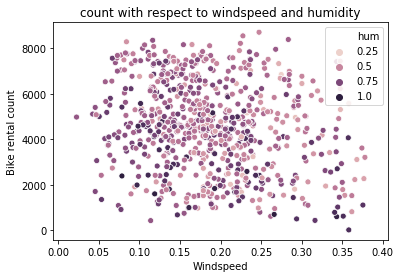

In [23]:
#some visualization for better understanding 

scatter_plot1 = sns.scatterplot(x="windspeed", y="cnt", hue="hum", data= Df)

plt.title("count with respect to windspeed and humidity")
plt.ylabel("Bike rental count")
plt.xlabel("Windspeed")

in this scatter plot the highest count of bike occured when the range of windespeed is between 0.10 to 0.15 where as humidity range from 0.5 to 0.75

Text(0.5, 0, 'temp')

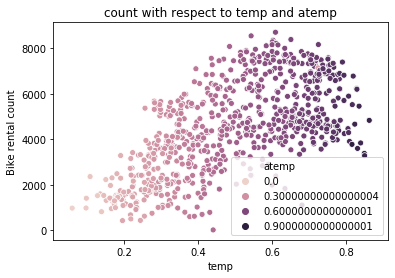

In [24]:
scatter_plot2 = sns.scatterplot(x="temp" , y="cnt", hue="atemp", data=Df)

plt.title("count with respect to temp and atemp")
plt.ylabel("Bike rental count")
plt.xlabel("temp")


highest count of bike when the the temp ranges 0.4 to 0.8

Text(0.5, 0, 'Weekdays')

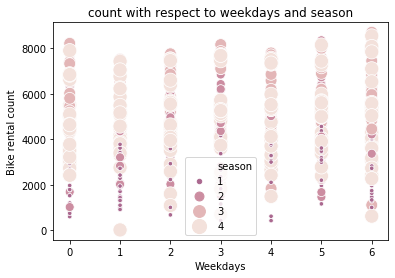

In [25]:
cmap = sns.cubehelix_palette(dark=.9, light=.5, as_cmap=True)

scatter_plot3 = sns.scatterplot(x="weekday", y="cnt",
            hue="season", size="season", sizes = (20, 200), palette=cmap, data= Df)

plt.title("count with respect to weekdays and season")
plt.ylabel("Bike rental count")
plt.xlabel("Weekdays")

count vs weekdays and season, Count is high in 4th season and 1st and 6th weekday

Text(0.5, 0, 'Temperature')

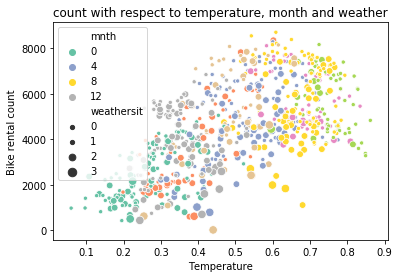

In [26]:
cmap2 = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

scatter_plot4 = sns.scatterplot(x="temp", y="cnt", hue="mnth", size="weathersit", palette="Set2", data=Df)

plt.title("count with respect to temperature, month and weather")
plt.ylabel("Bike rental count")
plt.xlabel("Temperature")

count vs temperature, month and weather, Count is high in range temperature 0.5 to 0.8, in 8th month and weather is 0.

Text(0.5, 0, 'Month')

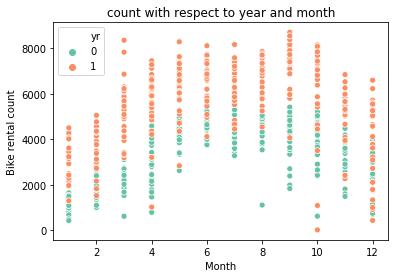

In [27]:
cmap3 = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

scatter_plot5 = sns.scatterplot(x="mnth", y="cnt", hue="yr", palette="Set2", data= Df)

plt.title("count with respect to year and month")
plt.ylabel("Bike rental count")
plt.xlabel("Month")


count respect to year and month, count is high in year 1, particularly from season 3 to 12 excluding 9

# Feature Selection

In [28]:
#selecting important variable 
#checking for correlation
Df_cor = Df.loc[:, num_var]
correlation_result = Df_cor.corr()
print(correlation_result)

               temp     atemp       hum  windspeed
temp       1.000000  0.991702  0.123723  -0.138937
atemp      0.991702  1.000000  0.137312  -0.164157
hum        0.123723  0.137312  1.000000  -0.200237
windspeed -0.138937 -0.164157 -0.200237   1.000000


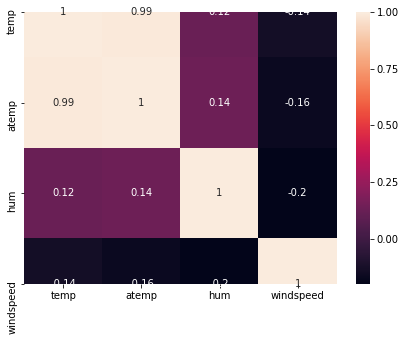

In [29]:
#draw map for correlation 
f, ax = plt.subplots(figsize=(7, 5))
#heatmap = sns.heatmap(correlation_result, annot=True)
sns.heatmap(correlation_result,annot=True,ax=ax)

It is found that temperature and atemp  are highly correlated with each other

In [30]:
#checking correlation of categorical variable with help of Anova Test
#loading reqiured libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [31]:
#Define function for anova test
def anova_test(Df,target):
    for i in cat_var:
        formula=('{} ~ {}').format(target, i)
        Df.lm = ols(formula,data=Df).fit()
        table = sm.stats.anova_lm(Df.lm, typ=1)
        print('Anova table between',target,'and',i,'is\n',table)   

In [32]:
#chechickng correlation between categorical variable with help of annova test
#anova test used to check when target variable is continuos and and other variable is categoarical
print('\n For target var = cnt')
anova_test(Df,'cnt')


 For target var = cnt
Anova table between cnt and season is
              df        sum_sq       mean_sq           F        PR(>F)
season      1.0  4.517974e+08  4.517974e+08  143.967653  2.133997e-30
Residual  729.0  2.287738e+09  3.138187e+06         NaN           NaN
Anova table between cnt and holiday is
              df        sum_sq       mean_sq         F    PR(>F)
holiday     1.0  1.279749e+07  1.279749e+07  3.421441  0.064759
Residual  729.0  2.726738e+09  3.740381e+06       NaN       NaN
Anova table between cnt and weekday is
              df        sum_sq       mean_sq         F    PR(>F)
weekday     1.0  1.246109e+07  1.246109e+07  3.331091  0.068391
Residual  729.0  2.727074e+09  3.740843e+06       NaN       NaN
Anova table between cnt and workingday is
                df        sum_sq       mean_sq         F    PR(>F)
workingday    1.0  1.024604e+07  1.024604e+07  2.736742  0.098495
Residual    729.0  2.729289e+09  3.743881e+06       NaN       NaN
Anova table between cnt

It is found that holiday, weekday and workingday has p value > 0.05, it means this variable are not the significant so drop the variable BY GOING FOR ulternate hypothesis

In [33]:
#droppin the variable by the result of heat map and annova test
Df = Df.drop(['atemp', 'holiday', 'weekday', 'workingday'] ,axis = "columns")
print(Df.shape)

(731, 8)


In [34]:
#Final Variables

num_var = ["temp","hum","windspeed","cnt"]   # numeric variables

cat_var = ["season","yr","mnth","weathersit"]   # categorical variables


# FEATURE SCALING

temp


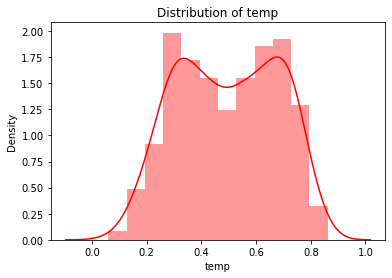

hum


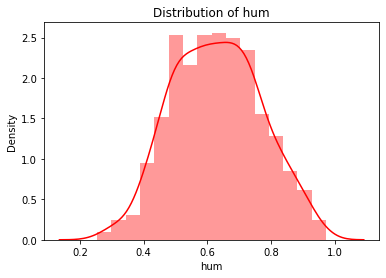

windspeed


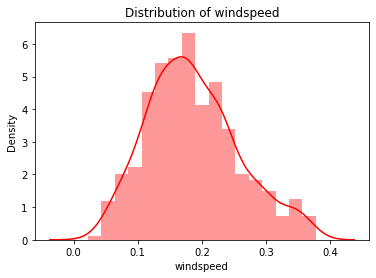

cnt


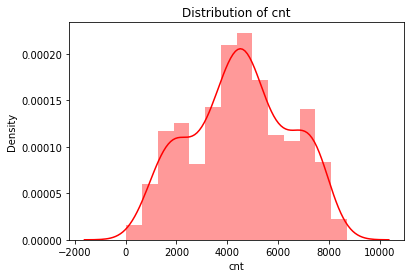

In [35]:
# Check normality 
for i in num_var:
    print(i)
    sns.distplot(Df[i], bins = 'auto', color = 'red')
    plt.title("Distribution of "+i)
    plt.ylabel("Density")
    plt.show()

 all are normaly distributed so by we have used standerdization

In [36]:
Df.describe()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.629354,0.186257,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.139566,0.071156,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.254167,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.522291,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.627500,0.178802,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.229786,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.378108,8714.000000


everything is normalized, so no need of scaling

# Model Development

In [37]:
Data = Df.copy()
Df = Data.copy()

In [38]:
# Create dummy variables
Df = pd.get_dummies(Df, columns = cat_var)

#new shape of data DF
Df.shape

(731, 25)

In [39]:
#copying data for cross validation
Data_xv = Df

In [40]:
#loading libraries for Error equation
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr

In [41]:
#creating function for error equaiton 

def MAPE(y_actual, y_predicted):
    MAPE = np.mean(np.abs(y_actual-y_predicted)/y_actual)*100
    return MAPE

def Rsquare(y_actual, y_predicted):
    Rsquare = np.corrcoef(y_actual,y_predicted)**2
    return Rsquare



In [42]:
#spliting the data in to train and test format
#loading rquired library
from sklearn.model_selection import train_test_split 

In [43]:
#divide data in predictor and target
x = Df.drop(['cnt'], axis = "columns")
y = Df['cnt']

In [44]:
#split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

# Linear Regression Model

In [45]:
#loading required libraries
import statsmodels.api as sm

In [46]:
#applying LR model to data
LR_Model= sm.OLS(y_train, x_train).fit()
print(LR_Model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     140.2
Date:                Fri, 31 Jan 2020   Prob (F-statistic):          1.63e-203
Time:                        19:39:07   Log-Likelihood:                -4716.2
No. Observations:                 584   AIC:                             9474.
Df Residuals:                     563   BIC:                             9566.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp          4807.6605    477.418     10.070   

In [47]:
# prediction after applying LR model to x_test data
LRTest = LR_Model.predict(x_test)
LRTest

196    4251.826852
187    4566.733411
14     1328.779496
31      851.323838
390    3514.412723
          ...     
566    5267.726974
688    4939.934477
266    5144.612644
504    7203.216753
239    4626.658735
Length: 147, dtype: float64

In [48]:
#checking error and acuracy 
#MAPE
LRMape_Test = MAPE(y_test, LRTest)

#Rsquare -Test Data
LRR2_Test = Rsquare(y_test, LRTest)

LRR2_Test1 = LRR2_Test.ravel()

LRR2_Test2 = float(LRR2_Test1[1])


print("MAPE="+str(LRMape_Test))
print("Accuracy =" + str(100 - LRMape_Test))
print("Rsquare ="+str(LRR2_Test2))

MAPE=18.800696038206937
Accuracy =81.19930396179306
Rsquare =0.8436040019904946


# Decision Tree

In [49]:
#laod requierd library of model
from sklearn.tree import DecisionTreeRegressor

In [50]:
#appling DT_model on train data
DTModel = DecisionTreeRegressor(max_depth=2).fit(x_train,y_train)
print(DTModel)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [51]:
# prediction after applying  DT_model to x_test data
DTTest = DTModel.predict(x_test)

In [52]:
#checking error and acuracy 
#MAPE
DTMape_Test = MAPE(y_test,DTTest)

#Rsquare -Test Data
DTR2_Test = Rsquare(y_test,DTTest)

DTR2_Test1 = DTR2_Test.ravel()

DTR2_Test2 = float(DTR2_Test1[1])


print("MAPE="+str(DTMape_Test))
print("Accuracy =" + str(100 - DTMape_Test))
print("Rsquare ="+str(DTR2_Test2))

MAPE=36.94809301452646
Accuracy =63.05190698547354
Rsquare =0.6544606873373331


# Random Forrest

In [53]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [54]:
#Aplying RF_model on train set of data 
RF_model = RandomForestRegressor(n_estimators = 10).fit(x_train,y_train)
print(RF_model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [55]:
# prediction after applying  DT_model to x_test data
RFTest = RF_model.predict(x_test)
RFTest 

array([5006.9, 4695.2, 1524.2, 1042.6, 2999.4, 2878. , 3780.1, 5846.3,
       6234.4,  852. , 1524.1, 1553.4, 1801. , 4984.2, 4687.9, 4604.3,
       7689.7, 5228.9, 3550.5, 2659.7, 7202.9, 2354.4, 5230.8, 4646.9,
       1942.7, 6861.4, 3619.5, 5189.7, 7628.1, 7356.6, 1326. , 4862.9,
       4551.6, 5269.5, 2232.4, 3824.4, 6290.9, 5893.9, 2358.8, 3335.9,
       6497.9, 1819.3, 4749.1, 3639. , 6795.6, 7532.3, 3405.2, 4237.5,
       2219.7, 1996.7, 6442.7, 6922.1, 5776.6, 6810.7, 4230.8, 3871.3,
       3474.2, 5408.5, 6473.3, 2424. , 6533.8, 3858.9, 4887.5, 7939.8,
       7230.4, 2395.8, 4341.7, 6519. , 6387.6, 4291.8, 6127. , 7113.6,
       4525.9, 7158.8, 4313.4, 5932.1, 6779.8, 7336.6, 3013.2, 2883.8,
       4416.7, 5552.4, 4989.6, 1846.8, 4586.5, 7416.4, 4762.3, 5763.5,
       4942.9, 4095.6,  857.7, 2223. , 6376.5, 6570.8, 5367.9, 3063. ,
       2055.3, 7067.3, 4730. , 2848.3, 3203. , 5368.1, 4306. , 7548.6,
       3367.6, 4395.7, 7662.4, 7266. , 5435.2, 2215.6, 3429.3, 3996. ,
      

In [56]:
#checking error and acuracy 
#MAPE
RFTest_Test = MAPE(y_test,RFTest)

#Rsquare -Test Data
RFR2_Test = Rsquare(y_test,RFTest)

RFR2_Test1 = DTR2_Test.ravel()

RFR2_Test2 = float(RFR2_Test1[1])


print("MAPE="+str(RFTest_Test))
print("Accuracy =" + str(100 - RFTest_Test))
print("Rsquare ="+str(RFR2_Test2))

MAPE=21.757663700520652
Accuracy =78.24233629947935
Rsquare =0.6544606873373331


# XGboost 

In [57]:
#XGB model
from xgboost import XGBRegressor
import xgboost as xgb

In [58]:
#creating model
model = xgb.XGBRegressor()

In [59]:
#fitting model 
model.fit(x_train, y_train)

C:\dddd\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [60]:
model.feature_importances_

array([0.15507914, 0.01828006, 0.01509744, 0.11763941, 0.01602467,
       0.01934073, 0.12896053, 0.27694234, 0.        , 0.02957579,
       0.00179205, 0.00966863, 0.0078602 , 0.01369585, 0.00605703,
       0.00510559, 0.00323977, 0.01331558, 0.01152577, 0.        ,
       0.00497155, 0.0575726 , 0.        , 0.08825524], dtype=float32)

In [61]:
model.feature_importances_

array([0.15507914, 0.01828006, 0.01509744, 0.11763941, 0.01602467,
       0.01934073, 0.12896053, 0.27694234, 0.        , 0.02957579,
       0.00179205, 0.00966863, 0.0078602 , 0.01369585, 0.00605703,
       0.00510559, 0.00323977, 0.01331558, 0.01152577, 0.        ,
       0.00497155, 0.0575726 , 0.        , 0.08825524], dtype=float32)

In [62]:
# prediction after applying  XGB_model to x_test data
XGBTest = model.predict(x_test)
XGBTest

array([5038.612  , 4556.4805 , 1527.4371 ,  741.52094, 3357.5806 ,
       2730.8171 , 3704.9568 , 5805.9355 , 5535.52   , 1173.0807 ,
       1304.2671 , 1559.4451 , 1598.0118 , 4855.168  , 4675.287  ,
       4194.993  , 7440.6353 , 5732.599  , 3726.4546 , 2683.5115 ,
       7301.781  , 2613.3625 , 5121.088  , 4577.5684 , 1445.7003 ,
       7015.8955 , 3411.375  , 5065.4795 , 7669.8477 , 6598.454  ,
       1192.4894 , 5109.959  , 5218.373  , 5047.462  , 1833.8429 ,
       3795.8423 , 6426.85   , 5799.449  , 2495.8303 , 3078.7168 ,
       6295.4785 , 1863.8684 , 4832.9307 , 3666.254  , 6988.7603 ,
       7655.7056 , 2853.5156 , 3986.5981 , 2694.1719 , 2425.5825 ,
       6851.761  , 6730.551  , 6017.0176 , 6932.0063 , 4064.1343 ,
       3897.185  , 3522.8115 , 6309.1553 , 7067.6313 , 3145.2834 ,
       6494.3423 , 4255.1978 , 3646.388  , 7752.3525 , 7249.305  ,
       3541.729  , 5027.584  , 6456.3076 , 6802.4233 , 4933.2036 ,
       6379.112  , 7315.399  , 3917.946  , 7315.399  , 4479.68

In [63]:
#checking error and acuracy 
#MAPE
XGBTest_Test = MAPE(y_test,XGBTest)

#Rsquare -Test Data
XGR2_Test = Rsquare(y_test,XGBTest)

XGR2_Test1 = DTR2_Test.ravel()

XGR2_Test2 = float(DTR2_Test1[1])


print("MAPE="+str(XGBTest_Test))
print("Accuracy =" + str(100 -XGBTest_Test))
print("Rsquare ="+str(LRR2_Test2))

MAPE=18.494600043907855
Accuracy =81.50539995609215
Rsquare =0.8436040019904946


# Cross validation 

In [64]:
#checking data head for cv
Data_xv.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
#split the data 
kv_x=Data_xv.drop(['cnt'], axis = "columns")
kv_y=Data_xv['cnt']

In [66]:
kv_x.head()

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [67]:
kv_y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [68]:
#loading libraries for cross validation
from sklearn.model_selection import cross_val_score

In [69]:
#for linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr_score=cross_val_score(lr,kv_x,kv_y, cv= 3)


In [70]:
lr_score.mean()

0.626364965698319

In [71]:
#for decision tree
dt = DecisionTreeRegressor(max_depth=2)

dt_score=cross_val_score(dt,kv_x,kv_y, cv= 3)
dt_score.mean()

0.05247379896663843

In [72]:
#for Random forrest
rf = RandomForestRegressor()

rf_score=cross_val_score(rf,kv_x,kv_y, cv= 3)
print(rf_score.mean())

C:\dddd\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\dddd\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\dddd\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.36901964381922453


In [73]:
#for Random forrest
xg =xgb.XGBRegressor()

xg_score=cross_val_score(xg,kv_x,kv_y, cv=3)
print(xg_score.mean())

[19:39:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\dddd\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\dddd\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\dddd\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:39:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5595401339182667


### after the result of all the score we have found that linear regression model and xgboost doing great job.
It is  also prove that,it is the good model for the given project